<a href="https://colab.research.google.com/github/TQT2203/btvn/blob/main/BTVN_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install tensorflow opencv-python matplotlib scikit-learn


In [3]:
from google.colab import files
import zipfile
import os

# Tải file ZIP từ máy lên Colab
uploaded = files.upload()  # Chọn file .zip của bạn

# Giải nén file ZIP
for filename in uploaded.keys():
    zip_path = filename
    extract_folder = filename.replace(".zip", "")

    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_folder)

    print(f"✅ Giải nén hoàn tất vào thư mục: {extract_folder}")

# Kiểm tra thư mục đã giải nén
os.listdir(extract_folder)

Saving dataset.zip to dataset.zip
✅ Giải nén hoàn tất vào thư mục: dataset


['Kien_normal',
 'Kien_happy',
 'Loc_happy',
 'Loc_normal',
 'Thai_normal',
 'Thai_sad',
 'Truong_normal',
 'Loc_sad',
 'Kien_sad',
 'Truong_happy',
 'Thai_happy',
 'Truong_sad']

In [4]:
import zipfile
import os

# Đường dẫn tới file ZIP
zip_path = "dataset.zip"
extract_to = "dataset"

# Giải nén
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("✅ Đã giải nén tập ảnh huấn luyện.")


✅ Đã giải nén tập ảnh huấn luyện.


In [5]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# === Cấu hình ===
IMG_SIZE = 100
dataset_path = "dataset"

# === Load & tiền xử lý dữ liệu ===
data = []
labels = []
label_map = {}
label_id = 0

for folder in os.listdir(dataset_path):
    if "_" not in folder:
        continue
    label_name = folder.lower()
    folder_path = os.path.join(dataset_path, folder)

    if not os.path.isdir(folder_path):
        continue

    label_map[label_id] = label_name

    for file in os.listdir(folder_path):
        img_path = os.path.join(folder_path, file)
        img = cv2.imread(img_path)
        if img is None:
            continue
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        face = cv2.resize(gray, (IMG_SIZE, IMG_SIZE))
        data.append(face)
        labels.append(label_id)

    label_id += 1

# Chuyển dữ liệu thành mảng NumPy
X = np.array(data).reshape(-1, IMG_SIZE, IMG_SIZE, 1) / 255.0
y = to_categorical(labels)

# Chia tập train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"✅ Tập huấn luyện: {X_train.shape[0]} mẫu, Tập kiểm tra: {X_test.shape[0]} mẫu")

# === Tạo mô hình CNN ===
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(len(label_map), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# === Huấn luyện ===
model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

# === Lưu mô hình (tùy chọn) ===
model.save("cnn_face_emotion_model.h5")
print("✅ Mô hình đã được huấn luyện và lưu.")


✅ Tập huấn luyện: 28 mẫu, Tập kiểm tra: 8 mẫu


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.1429 - loss: 2.4903 - val_accuracy: 0.0000e+00 - val_loss: 5.5942
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step - accuracy: 0.1429 - loss: 3.9603 - val_accuracy: 0.0000e+00 - val_loss: 4.6252
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 543ms/step - accuracy: 0.1071 - loss: 2.8400 - val_accuracy: 0.0000e+00 - val_loss: 3.8792
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step - accuracy: 0.1429 - loss: 2.8795 - val_accuracy: 0.0000e+00 - val_loss: 3.2465
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step - accuracy: 0.2857 - loss: 2.5340 - val_accuracy: 0.0000e+00 - val_loss: 2.9165
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 632ms/step - accuracy: 0.2500 - loss: 2.2494 - val_accuracy: 0.0000e+00 - val_loss: 2.7859
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 600ms/step - accuracy: 0.5000 - loss: 2.0934 - val_accuracy: 0.0000e+00 - val_loss: 2.7131
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 651ms/step - accuracy: 0.3571 - loss: 2.1024 - val_acc

✅ Mô hình đã được huấn luyện và lưu.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
👉 Đây là LOC và đang cảm thấy HAPPY (0.53)


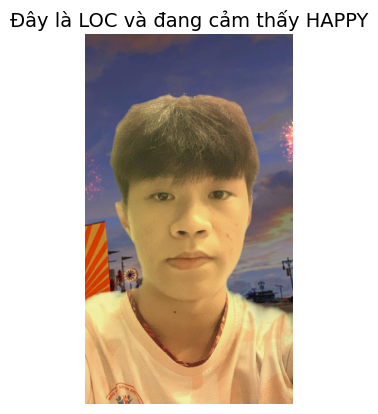

In [6]:
def predict_image(image_path):
    img = cv2.imread(image_path)
    if img is None:
        print("❌ Không thể đọc ảnh.")
        return

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    face = cv2.resize(gray, (IMG_SIZE, IMG_SIZE))
    face_input = face.reshape(1, IMG_SIZE, IMG_SIZE, 1) / 255.0

    pred = model.predict(face_input)[0]
    label_id = np.argmax(pred)
    confidence = pred[label_id]
    label_name = label_map[label_id]
    person, emotion = label_name.split("_", 1)

    print(f"👉 Đây là {person.upper()} và đang cảm thấy {emotion.upper()} ({confidence:.2f})")

    # Hiển thị ảnh kèm chú thích
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.title(f"Đây là {person.upper()} và đang cảm thấy {emotion.upper()}", fontsize=14)
    plt.axis("off")
    plt.show()
predict_image("/Loc.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
👉 Đây là THÁI và đang cảm thấy NORMAL (0.15)


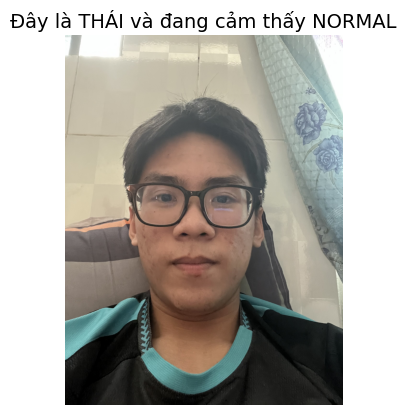

In [ ]:
def predict_image(image_path):
    img = cv2.imread(image_path)
    if img is None:
        print("❌ Không thể đọc ảnh.")
        return

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    face = cv2.resize(gray, (IMG_SIZE, IMG_SIZE))
    face_input = face.reshape(1, IMG_SIZE, IMG_SIZE, 1) / 255.0

    pred = model.predict(face_input)[0]
    label_id = np.argmax(pred)
    confidence = pred[label_id]
    label_name = label_map[label_id]
    person, emotion = label_name.split("_", 1)

    print(f"👉 Đây là {person.upper()} và đang cảm thấy {emotion.upper()} ({confidence:.2f})")

    # Hiển thị ảnh kèm chú thích
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.title(f"Đây là {person.upper()} và đang cảm thấy {emotion.upper()}", fontsize=14)
    plt.axis("off")
    plt.show()
predict_image("/content/IMG_1627.jpg")